**Due**:Tuesday, June 21, 2024 11:59 PM EST

**Author**:Alejandro M. Ouslan

# Use the data in **WAGE2** in this exercise.

- Consider the standard wage equation

$$\log(wage) = \beta_0 + \beta_1 educ + \beta_2 exper + \beta_3 tenure + u$$

- State the null hypothesis that another year of general workforce experience has the same effect on log(wage) as another year of tenure with the current employer.

    - **Answer**:
    $$H_0: \beta_2 = 0$$
    $$H_0: \beta_2 \neq 0$$
- Test the null hypothesis in part $i$ against a two-sided alternative, at the $5/%$
significance level, by constructing a $95\%$ confidence interval. What do you conclude?

    - **Answer**: The p-value for workforce experience is $0.000$ and since the p-value is less than the significance level of $0.05$, we reject the null hypothesis.

In [1]:
# Imports 
import matplotlib.pyplot as plt 
import statsmodels.api as sm
from scipy import stats
import polars as pl
import pandas as pd
import os 
os.chdir("..")

In [2]:
# Run the regression Model OLS

df = pd.read_stata("data/raw/WAGE2.dta")
x = sm.add_constant(df[["educ", "exper", "tenure"]])
reg = sm.OLS(endog=df["lwage"], exog=x, missing='drop')
print(reg.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     56.97
Date:                Fri, 21 Jun 2024   Prob (F-statistic):           8.12e-34
Time:                        18:38:32   Log-Likelihood:                -438.84
No. Observations:                 935   AIC:                             885.7
Df Residuals:                     931   BIC:                             905.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.4967      0.111     49.731      0.0

# Use the data in WAGE1 for this exercise

- Estimate the equation

$$wage = \beta_0 + \beta_1 educ + \beta_2 exper + \beta_3 tenure + u$$

Save the residuals and plot a histogram.

<Axes: >

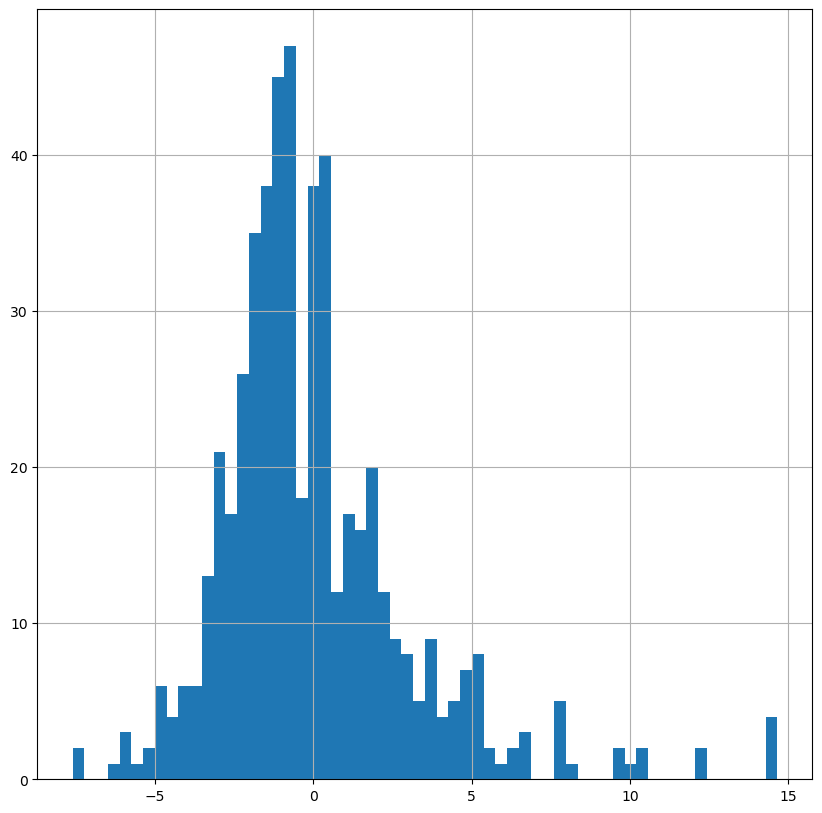

In [3]:
df = pd.read_stata("data/raw/WAGE1.dta")
x = sm.add_constant(df[["educ", "exper", "tenure"]])
reg_wage2 = sm.OLS(endog=df["wage"], exog=x, missing='drop').fit()
resit1 = reg_wage2.resid
resit1.hist(bins=60, figsize=(10, 10))

- Repeat part i, but with log(wage) as the dependent variable.


<Axes: >

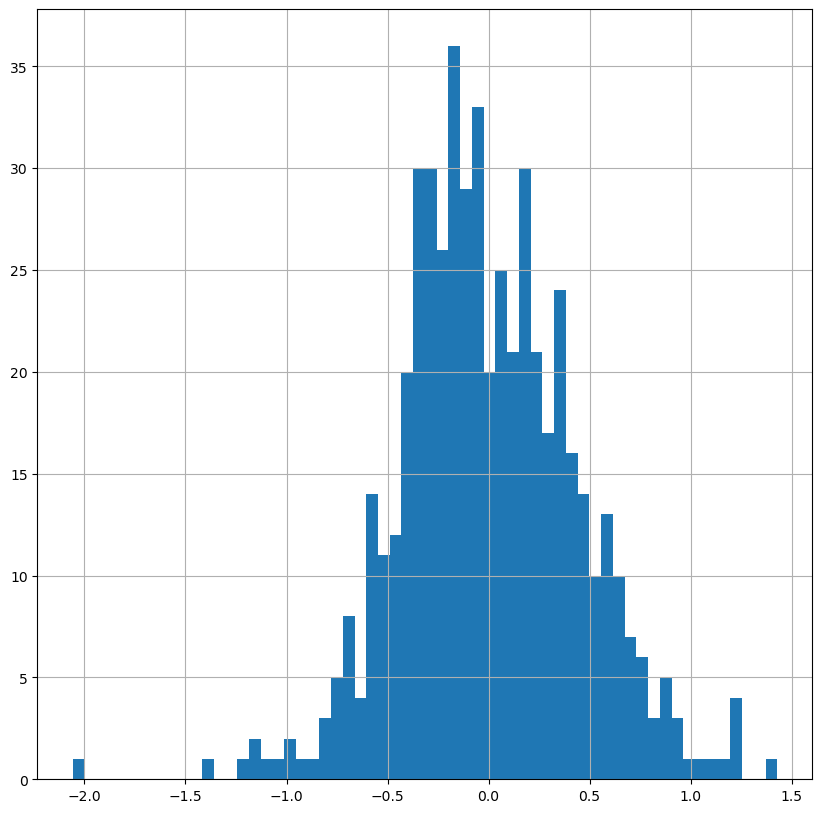

In [4]:
# creating regression plots 
reg_wage1 = sm.OLS(endog=df["lwage"], exog=x, missing='drop').fit()
resit2 = reg_wage1.resid
resit2.hist(bins=60, figsize=(10, 10))

- Would you say that Assumption MLR.6 (Normality) is closer to being satisfied for the level-level model or the log-level model?

    - **Answer**: Using a normally test based on D’Agostino and Pearson’s [1], [2] test that combines skew and kurtosis to produce an omnibus test of normality, we find that the data is not normally distributed. However, the log-level is more normal distributed than level-level.

In [5]:
# normality test
res1 = stats.normaltest(resit1)
res2 = stats.normaltest(resit2)
print(f"Norm test for level-level: {round(res1.pvalue, 3)}")
print(f"Norm test for log-level: {round(res2.pvalue, 3)}")

Norm test for level-level: 0.0
Norm test for log-level: 0.003


# Suppose you run the following model:

$$log(wage) = \beta_0 + \beta_1 educ + \beta_2 Experience + u$$

- Please write the regression with the corresponding estimates now. What has the bigger effect?

$$log(wage) = 1.51 + .079 educ + .013 Experience + u$$
- What is the interpretation of each coefficient?

    - **Answer:** This means that an increase of 1 unit in education level will increase the logarithm of the wage by $.079$, and an increase of 1 unit in experience will increase the logarithm of the wage by $.013$.

- What is the goodness of fit of this model?

    - **Answer:** The goodness of fit of this model is $0.21$.

- Now suppose you have the following model:

$$log(wage) = \beta_0 + \beta_1 educ + \beta_2 Experience + \beta_3 hoursworked + \beta_4 weekworked + u$$

- Has there been any changes to our restricted model? Are education and experience still significant?

    - **Answer:** No, there has not been any changes to our restricted model. Education and experience are still significant.
- Is this model better at predicting wage than our previous model? Explain.

    - **Answer:** This model is better since it is fixing the effects of hours worked and week worked.

#### References

- [1] D’Agostino, R. B. (1971), “An omnibus test of normality for moderate and large sample size”, Biometrika, 58, 341-348

- [2] D’Agostino, R. and Pearson, E. S. (1973), “Tests for departure from normality”, Biometrika, 60, 613-622
